# Stock Prediciton with Nueral Net

import neccescary packages

In [40]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import yfinance as yf
from sklearn.preprocessing import MinMaxScaler

In [47]:
from keras.layers import LSTM, Dense, Dropout
from keras.models import Sequential


ModuleNotFoundError: No module named 'tensorflow'

# Get the stock market data for Nividia

In [22]:
start_date = '2010-01-01'
end_date = '2024-4-1'
ticker = 'NVDA'

df=yf.download(ticker, start=start_date, end=end_date)
df.head()

[*********************100%***********************]  1 of 1 completed


c:\Users\MDoyl\AppData\Local\Programs\Python\Python311\Lib\site-packages\yfinance\utils.py:689: FutureWarning: The 'unit' keyword in TimedeltaIndex construction is deprecated and will be removed in a future version. Use pd.to_timedelta instead.
  df.index += _pd.TimedeltaIndex(dst_error_hours, 'h')


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2010-01-04,4.6275,4.655,4.5275,4.6225,4.240229,80020400
2010-01-05,4.6050,4.740,4.6050,4.6900,4.302146,72864800
2010-01-06,4.6875,4.730,4.6425,4.7200,4.329667,64916800
2010-01-07,4.6950,4.715,4.5925,4.6275,4.244816,54779200
2010-01-08,4.5900,4.670,4.5625,4.6375,4.253988,47816800


# Perform EDA

In [23]:

print(df.info())
print(df.describe())
print(df.value_counts())


<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 3583 entries, 2010-01-04 to 2024-03-28
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       3583 non-null   float64
 1   High       3583 non-null   float64
 2   Low        3583 non-null   float64
 3   Close      3583 non-null   float64
 4   Adj Close  3583 non-null   float64
 5   Volume     3583 non-null   int64  
dtypes: float64(5), int64(1)
memory usage: 195.9 KB
None
              Open         High          Low        Close    Adj Close  \
count  3583.000000  3583.000000  3583.000000  3583.000000  3583.000000   
mean     83.984129    85.505354    82.415455    84.049527    83.772114   
std     138.140162   140.642487   135.502567   138.245392   138.289805   
min       2.180000     2.262500     2.162500     2.220000     2.036411   
25%       4.291250     4.377500     4.231250     4.301250     3.966185   
50%      25.900000    26.254999    25.602501    25.8700

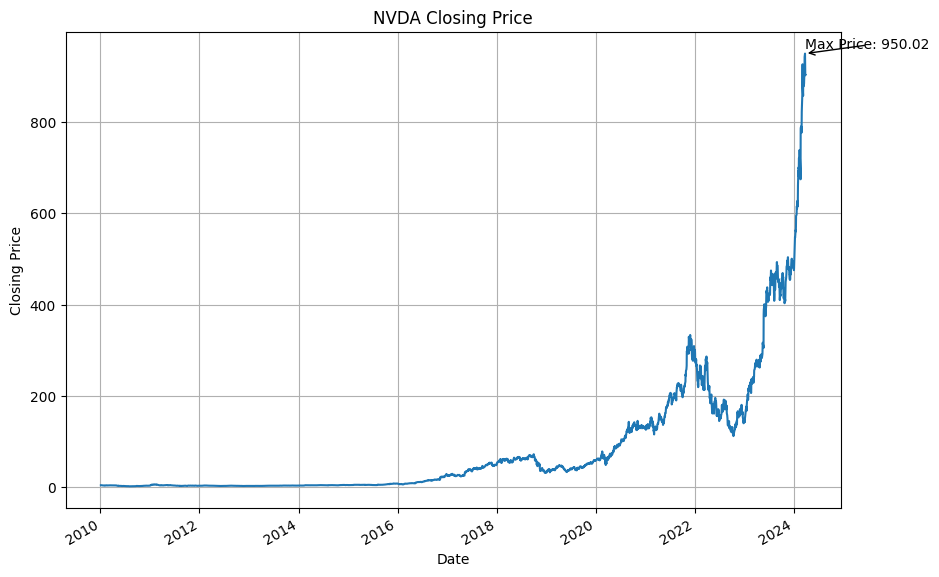

In [24]:
df['Close'].plot(figsize=(10, 7))
plt.xlabel('Date')
plt.ylabel('Closing Price')
plt.title('NVDA Closing Price')
plt.grid(True)


# Label the maximum price
max_price = round(df['Close'].max(),2)
max_index = df['Close'].idxmax()
plt.annotate(f'Max Price: {max_price}', xy=(max_index, max_price), xytext=(max_index, max_price+10),
             arrowprops=dict(facecolor='black', arrowstyle='->'))

plt.show()


In [25]:
#Reset Data Index
df.reset_index(inplace=True)
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2010-01-04,4.6275,4.655,4.5275,4.6225,4.240229,80020400
1,2010-01-05,4.6050,4.740,4.6050,4.6900,4.302146,72864800
2,2010-01-06,4.6875,4.730,4.6425,4.7200,4.329667,64916800
3,2010-01-07,4.6950,4.715,4.5925,4.6275,4.244816,54779200
4,2010-01-08,4.5900,4.670,4.5625,4.6375,4.253988,47816800


Creating a 100 day Moving Average to plot against the close price

In [26]:
ma_100 = df['Close'].rolling(100).mean()

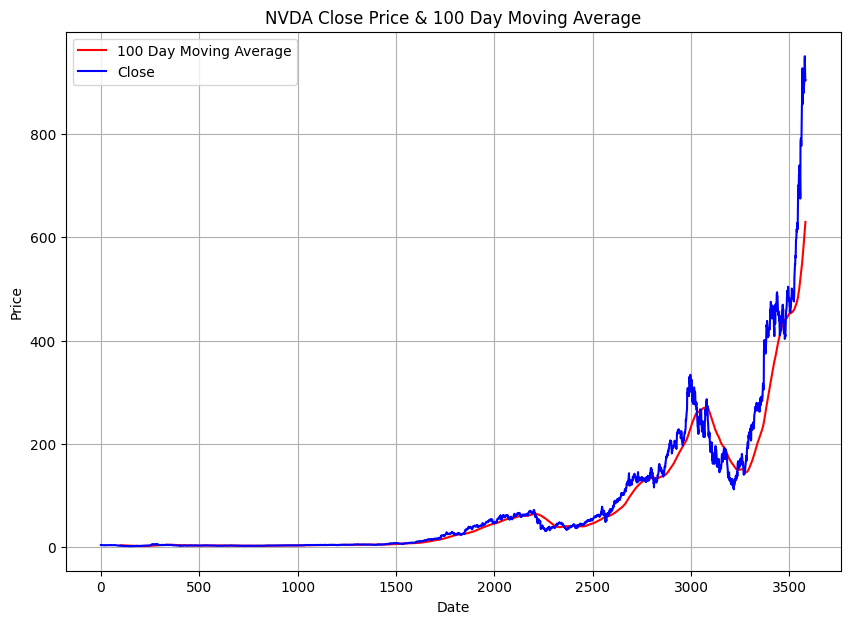

In [30]:
plt.figure(figsize=(10, 7))
plt.plot(ma_100, label='100 Day Moving Average',color='red') 
plt.plot(df['Close'], label='Close', color='blue')
plt.xlabel('Date')
plt.ylabel('Price')
plt.title('NVDA Close Price & 100 Day Moving Average')
plt.grid(True)
plt.legend()


Creating a 325 day Moving Average to plot against the close price


In [32]:
ma_325 = df['Close'].rolling(325).mean()

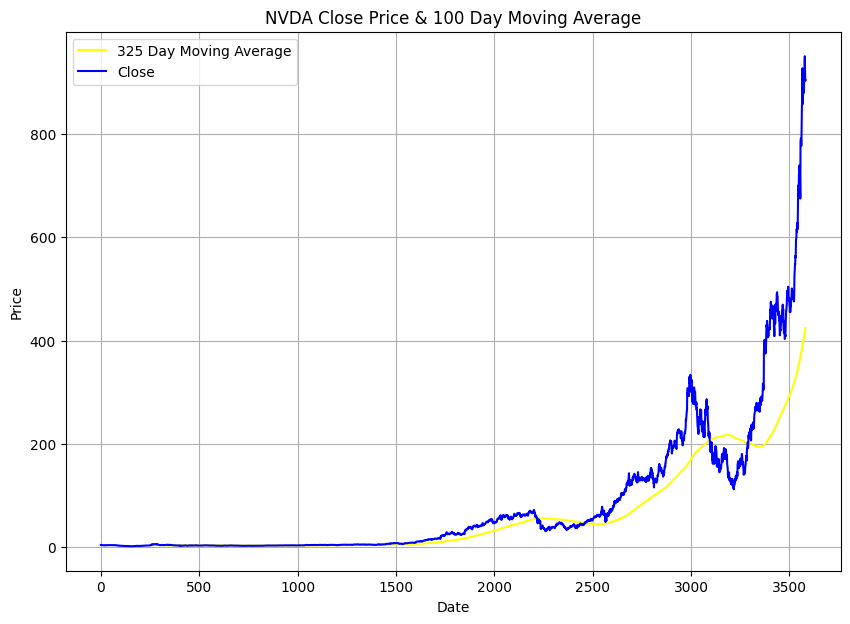

In [33]:
plt.figure(figsize=(10, 7))
plt.plot(ma_325, label='325 Day Moving Average',color='yellow') 
plt.plot(df['Close'], label='Close', color='blue')
plt.xlabel('Date')
plt.ylabel('Price')
plt.title('NVDA Close Price & 100 Day Moving Average')
plt.grid(True)
plt.legend()


Plot all 3 


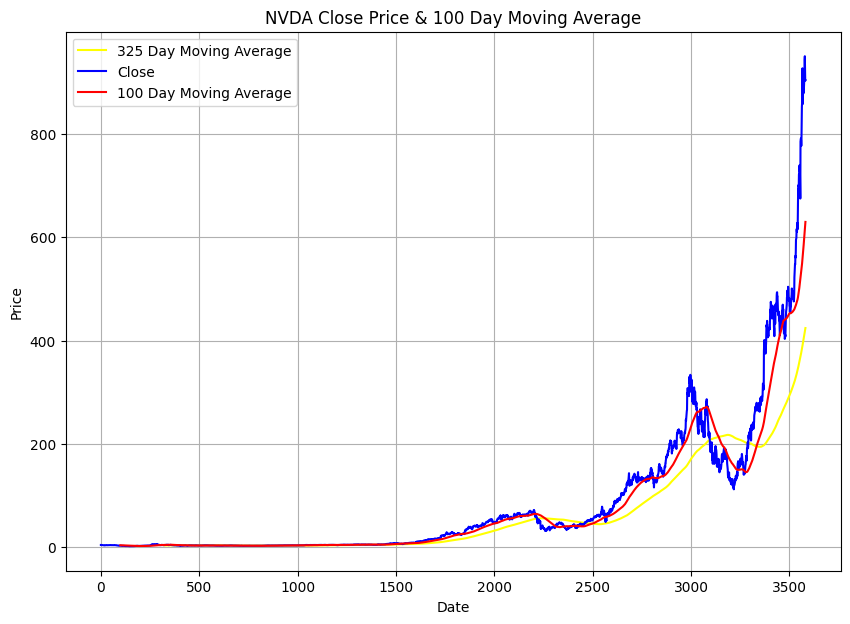

In [34]:
plt.figure(figsize=(10, 7))
plt.plot(ma_325, label='325 Day Moving Average',color='yellow') 
plt.plot(df['Close'], label='Close', color='blue')
plt.plot(ma_100, label='100 Day Moving Average',color='red')
plt.xlabel('Date')
plt.ylabel('Price')
plt.title('NVDA Close Price & 100 Day Moving Average')
plt.grid(True)
plt.legend()


# Pre Processing Data


In [35]:
df.dropna(inplace=True)


In [39]:
data_train = pd.DataFrame(df.Close[0: int(len(df)*0.8)])
data_test = pd.DataFrame(df.Close[int(len(df)*0.8): len(df)])
print(data_train.shape, data_test.shape)

(2866, 1) (717, 1)


In [42]:
scaler = MinMaxScaler(feature_range=(0,1))

In [44]:
data_train_scaled = scaler.fit_transform(data_train)

In [45]:
x = []
y = []
for i in range(100, len(data_train)):
    x.append(data_train_scaled[i-100:i, 0])
    y.append(data_train_scaled[i, 0])

# Model Creation